In [7]:
import numpy as np

#Create a 2D lattice of random spins (-1 or 1)
N = 10 #dimension of 2D lattice
J = 1 #constant in the Hamiltonian. positive means ferromagnet
kb = 1 #boltzmann Constant
T = 1 #temperature
Beta = 1/(kb*T)
rando = np.random.randint(0,2,(N,N))



for i in range(len(rando[:,0]
                  )):
    for j in range(len(rando[0,:])):
        if rando[i,j] == 0:
            rando[i,j] = -1
            
print(rando)

#Now the variable rando holds a 2D lattice with random values of -1 and 1             

[[ 1 -1  1  1 -1  1  1  1 -1  1]
 [ 1  1  1  1  1  1  1  1  1 -1]
 [ 1 -1 -1  1  1 -1  1  1 -1 -1]
 [ 1  1 -1 -1  1 -1  1 -1 -1 -1]
 [-1  1 -1 -1  1  1  1 -1 -1 -1]
 [-1  1  1  1  1  1  1 -1  1  1]
 [-1  1 -1 -1 -1  1 -1  1 -1  1]
 [-1 -1  1 -1  1 -1  1 -1  1  1]
 [ 1 -1 -1 -1  1 -1  1  1 -1 -1]
 [-1  1 -1  1  1  1 -1  1  1 -1]]


In [8]:
#Now we need a function that calculates the energy of the lattice given a hamiltonian.

def get_energy(twoDarray): #inputs a 2D array
    center = twoDarray
    up = np.roll(center,-1,axis=0)
    right = np.roll(center,-1,axis=1)
    energy = -J*np.sum((up+right)*center) #This method counts each pair once and uses periodic boundary conditions
    return energy

print(get_energy(rando))

8


In [53]:
#Now we have the bones for the problem. We can now apply the metroplis algorithm to this problem.
#This bit of code just changes some of the values
#iterations = 30 

#for i in range(iterations): 
    #Select a random spin position to flip:
   # icoord = np.random.randint(0,N) 
   # jcoord = np.random.randint(0,N)
   # random_spin = rando[icoord,jcoord]
   # if random_spin == 1:
   #     rando[icoord,jcoord] = -1
        
   # else:
     #   rando[icoord,jcoord] = 1

        

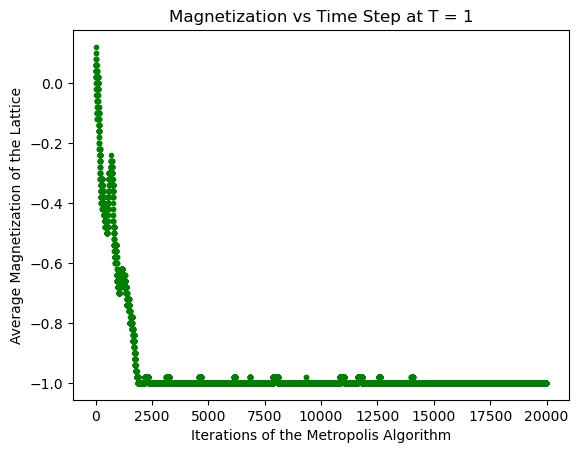

In [9]:
import math
import random
import matplotlib.pyplot as plt

#iterations = 30000

iterarr = []
magperiteration = []
    

def magnet(rando,Beta): 
    iterations = 20000
    iterarr = []
    magperiteration = []
    for i in range(iterations): 
        #Select a random spin position to flip:
        icoord = np.random.randint(0,N) 
        jcoord = np.random.randint(0,N)
        random_spin = rando[icoord,jcoord] 
        rando1 = np.copy(rando) #making a copy to make the change to (proposed change)
        if random_spin == 1:
            rando1[icoord,jcoord] = -1
            dE = get_energy(rando1)-get_energy(rando)
        else:
            rando1[icoord,jcoord] = 1
            dE = get_energy(rando1)-get_energy(rando)
        if dE < 0:
            rando = rando1 #accept the change if the energy is favorable
        else:
            P = math.e**(-Beta*dE)
            number = random.random()
            if P >= number:
                rando = rando1
            else:
                rando = rando
        M = (1/(N*N)*np.sum(rando))
        magperiteration.append(M)
    Mavg = abs(np.sum(magperiteration[iterations-4000:iterations]))/4000
    #print(rando)
    return Mavg

def magnetplotter(rando,Beta): 
    iterations = 20000
    iterarr = []
    magperiteration = []
    for i in range(iterations): 
        #Select a random spin position to flip:
        icoord = np.random.randint(0,N) 
        jcoord = np.random.randint(0,N)
        random_spin = rando[icoord,jcoord] 
        rando1 = np.copy(rando) #making a copy to make the change to (proposed change)
        if random_spin == 1:
            rando1[icoord,jcoord] = -1
            dE = get_energy(rando1)-get_energy(rando)
        else:
            rando1[icoord,jcoord] = 1
            dE = get_energy(rando1)-get_energy(rando)
        if dE < 0:
            rando = rando1 #accept the change if the energy is favorable
        else:
            P = math.e**(-Beta*dE)
            number = random.random()
            if P >= number:
                rando = rando1
            else:
                rando = rando
        M = (1/(N*N)*np.sum(rando))
        magperiteration.append(M)
        iterarr.append(i)
    Mavg = abs(np.sum(magperiteration[iterations-1000:iterations]))/1000
    #print(rando)
    return magperiteration

nums = magnetplotter(rando,Beta)
iterarray = np.linspace(0,19999,20000)


plt.plot(iterarray,nums,"g.")
plt.xlabel("Iterations of the Metropolis Algorithm")
plt.ylabel("Average Magnetization of the Lattice")
plt.title("Magnetization vs Time Step at T = 1")
plt.show()



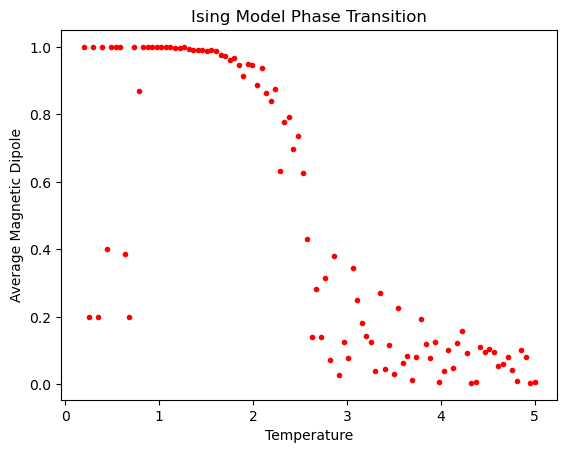

In [10]:
#Now we want to plot the phase transition
#Creating a set of Temperatures to plot against
T = np.linspace(.2,5,100)
Beta = 1/(kb*T)

magpoints = []

for i in range(len(T)):
    magpoints.append(magnet(rando,Beta[i]))
    

plt.plot(T,magpoints,"r.")
plt.xlabel("Temperature")
plt.ylabel("Average Magnetic Dipole")
plt.title("Ising Model Phase Transition")
plt.show()
